In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def scrape_race_commentary(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        commentary_elements = soup.find_all('span', class_='mslt-msg_text-content')
        commentary_text = [element.get_text() for element in commentary_elements]
        return commentary_text
    else:
        return None


In [4]:
url = 'https://www.autosport.com/f1/live-text/f1-japanese-gp-live-commentary-and-updates-race-1121734/1121734/#:~:text=09%3A59%20Perez%20completes%20the,by%20to%20take%20seventh%20place.'
commentary_data = scrape_race_commentary(url)

In [5]:
if commentary_data:
    for i, comment in enumerate(commentary_data):
        print(f"Comment {i + 1}: {comment}\n")

Comment 1: So join us on the 19-21 April for the Chinese GP weekend which also includes the first sprint race of the season. Until then, have a lovely rest of your Sunday. Go well!

Comment 2: The trophies are handed out and the podium finishers get busy with the fizzy! That marks the end of the Japanese GP weekend - but in just two weeks we go again with a return to China.

Comment 3: It is time for the podium, with the very familiar combination of the Dutch and Austrian national anthems playing to mark Verstappen's win for Red Bull.

Comment 4: Sainz lets out a sigh as he watches Verstappen cross the line with nobody else in the picture. That's a good summary of the last couple of years in F1 has generally been. Dominant from Red Bull and Verstappen once again.

Comment 5: They then assess the first-lap clash between Albon and Ricciardo, and Verstappen turns into a steward to say it was unfortunate with Ricciardo looking left towards the corner and not seeing Albon behind him. Maxpla

In [6]:
def extract_overtakes(commentary_text):
    overtakes = [comment for comment in commentary_text if 'overtake' in comment.lower() or 'pass' in comment.lower()]
    return overtakes

In [7]:
if commentary_data:
    overtakes = extract_overtakes(commentary_data)

    print("Overtakes:")
    for i, overtake in enumerate(overtakes):
        print(f"{i + 1}: {overtake}")

Overtakes:
1: "I had a good race, so very happy, it was tough out there with the degradation, but then the clouds came and the degradation was lower. Then I had a lot of cars to overtake which is tricky here," Sainz summaries of his race.
2: A dominant display for Red Bull, but an exciting race with lots of overtakes thanks to differing tyre strategies.
3: Hulkenberg now passes Magnussen, who had been trying to make a one-stop strategy work.
4: Up to P13 goes Hulkenberg. It's been a tough race for him after a dreadful restart, as Stroll passes Magnussen around the outside of The Esses for P11.


In [8]:
def extract_pit_stops(commentary_text):
    pit_stop_keywords = ['pit', 'box', 'pitting']
    pit_stops = [comment for comment in commentary_text if any(keyword in comment.lower() for keyword in pit_stop_keywords)]
    return pit_stops


In [9]:
if commentary_data:
    pit_stops = extract_pit_stops(commentary_data)

    print("\nPit Stops:")
    for i, pit_stop in enumerate(pit_stops):
        print(f"{i + 1}: {pit_stop}")


Pit Stops:
1: "It was a good weekend for the team, with the start and the restart was hard to keep the focus for such a long time. My second start was better but just not enough to get by Max. We paid the price as we were off balance in that first stint which meant we couldn't keep it alive and we had to box and we were undercut by Lando, but then on the hard I was more comfortable so we came back," Perez concludes on his race.
2: Unsurprisingly, Williams pit Sargeant for a fresh set of tyres. He's now at the back of the pack, 38s off Gasly in P16.
3: Assuming Leclerc sticks with his one-stop strategy, that'll be it for the pitstops for the frontrunners. Verstappen leads by 8.9s from Perez, who has a 6.2s gap to Leclerc in third.
4: Hamilton duly pits at the end of lap 39 for mediums and comes out in ninth and behind Russell.


In [10]:
def extract_retirements(commentary_text):
    retirement_keywords = ['retire', 'out', 'mechanical issue', 'technical problem']
    retirements = [comment for comment in commentary_text if any(keyword in comment.lower() for keyword in retirement_keywords) and len(comment.split()) > 5]
    return retirements


In [11]:
if commentary_data:
    retirements = extract_retirements(commentary_data)

    print("\nRetirements:")
    for i, retirement in enumerate(retirements):
        print(f"{i + 1}: {retirement}")


Retirements:
1: The trophies are handed out and the podium finishers get busy with the fizzy! That marks the end of the Japanese GP weekend - but in just two weeks we go again with a return to China.
2: Sainz lets out a sigh as he watches Verstappen cross the line with nobody else in the picture. That's a good summary of the last couple of years in F1 has generally been. Dominant from Red Bull and Verstappen once again.
3: "I had a good race, so very happy, it was tough out there with the degradation, but then the clouds came and the degradation was lower. Then I had a lot of cars to overtake which is tricky here," Sainz summaries of his race.
4: Hulkenberg just misses out in 11th ahead of Stroll, Magnussen, Bottas, Ocon, Gasly and Sargeant as the classified finishers. DNFs for Zhou, Ricciardo and Albon.
5: Piastri goes wide out of the chicane and at the start of the final lap Russell gets by to take seventh place.
6: Up to P13 goes Hulkenberg. It's been a tough race for him after a d

ValueError: Invalid RGBA argument: 'bronze'

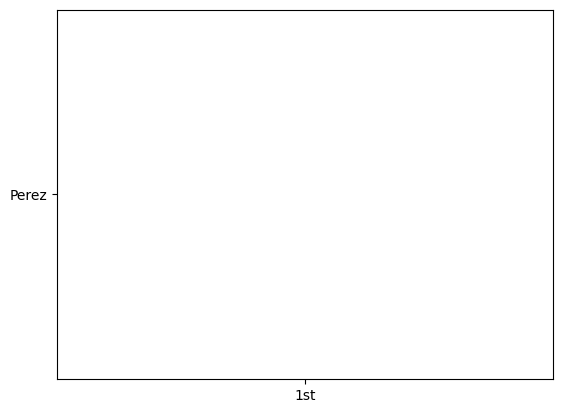

In [23]:
import re
import matplotlib.pyplot as plt

def find_podium_finishes(commentary_text):
    podium_finishes = []

    # Define patterns for podium mentions
    patterns = [
        r"\b(Perez)\b",
        r"\b(Sainz)\b",
        r"\b(Verstappen)\b"
    ]

    # Search for podium mentions in the commentary
    for pattern in patterns:
        matches = re.findall(pattern, commentary_text, flags=re.IGNORECASE)
        if matches:
            podium_finishes.append(matches[0])

    return podium_finishes

# Example commentary text
commentary_text = "The podium trio make their way to the cooldown room for a drink and a chat. Sainz asks Verstappen if they considered a one-stop but he shakes his head, and Perez adds the hard was the strong tyre today."

# Find podium finishes in the commentary text
podium_finishes = find_podium_finishes(commentary_text)

# Create podium visualization
positions = ["1st", "2nd", "3rd"]
drivers = podium_finishes
plt.bar(positions, drivers, color=['gold', 'silver', 'bronze'])
plt.xlabel('Position')
plt.ylabel('Driver')
plt.title('Podium Finishes')
plt.show()
